<a href="https://colab.research.google.com/github/ehsanmohammadi1370/ehsan_machine_learning_toolbox/blob/main/MY_RL_Q_iter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


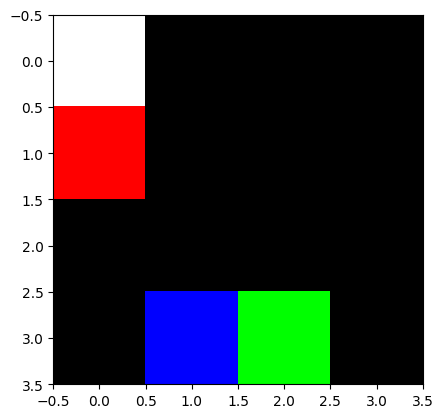

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
gamma=0.9
action=np.array([0,1,2,3])
action_names=['u','d','r','l']
s=np.array([[0,1,2,3],
            [4,5,6,7],
            [8,9,10,11],
            [12,13,14,15]])
Q=np.zeros((np.size(s),np.size(action)))
block=np.array([4])  # red
goal=np.array([14])  # green
hole=np.array([13])  # blue
s0=0            # white
def space_plot(s,block,goal,hole,s0):
  space=np.zeros((np.shape(s)[0],np.shape(s)[1],3))
  space[np.where(s ==block)[0],np.where(s ==block)[1],0]=1
  space[np.where(s ==goal)[0],np.where(s ==goal)[1],1]=1
  space[np.where(s ==hole)[0],np.where(s ==hole)[1],2]=1
  space[np.where(s ==s0)[0],np.where(s ==s0)[1],0:3]=1
  plt.figure()
  plt.imshow(space)
  return
space_plot(s,block,goal,hole,s0)

In [3]:
def select_action(Q,s0):
  indexes=np.where(Q[s0,:]==max(Q[s0,:]))
  indexes=np.array(indexes[0])
  return indexes[random.randint(0,np.size(indexes)-1)]
  # return Q[s0,:].argmax()
Q_test=Q
Q_test[s0,:]=np.array([0.1,0.1,0.22,0.22])
select_action(Q_test,s0)

2

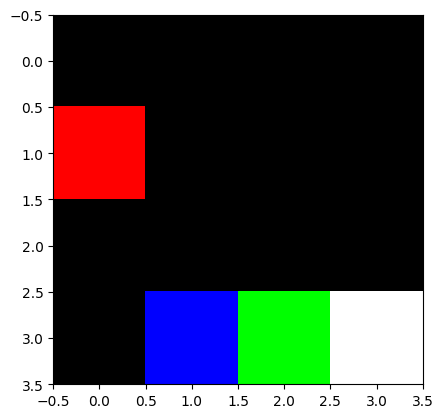

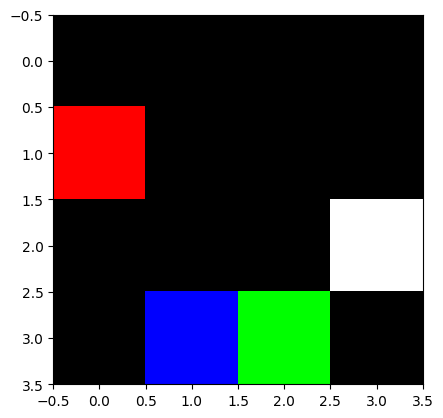

In [4]:
from copy import error
def get_state(s,s0,a,block):
  s1=0
  i=np.where(s==s0)[0]
  j=np.where(s==s0)[1]
  if (a==0):
    if(i-1>-1 and (s[i-1,j]!=block)[0]):
      s1=s[i-1,j]
    else:
      s1=s0
  elif (a==1):
    if(i+1<np.shape(s)[0] and (s[i+1,j]!=block)[0]):
      s1=s[i+1,j]
    else:
      s1=s0
  elif (a==2):
    if(j+1<np.shape(s)[1] and (s[i,j+1]!=block)[0]):
      s1=s[i,j+1]
    else:
      s1=s0
  elif (a==3):
    if(j-1>-1 and (s[i,j-1]!=block)[0]):
      s1=s[i,j-1]
    else:
      s1=s0
  else:
    raise error('incorrect action')
  return s1
space_plot(s,block,goal,hole,15)
a=0
s1=get_state(s,15,a,block)
space_plot(s,block,goal,hole,s1)

In [5]:
def get_reward(s0,s1,goal,hole):
  if(s0==s1):
    r=-2
  elif(s1==goal):
    r=+10
  elif(s1==hole):
    r=-10
  else:
    r=-1
  return r
get_reward(1,14,goal,hole)

10

In [6]:
def update_Q(r,Q,s0,a,s1):
  Q[s0,a]=r+gamma*max(Q[s1,:])
  return Q

In [16]:
cnt0=0
cnt1=0
Q=np.random.rand(np.size(s),np.size(action))
# Q=np.zeros((np.size(s),np.size(action)))
# Q=np.load('/drive/MyDrive/AI_ML_feature_eng/codes/Q_0.npy')
print(Q)
while(cnt1<=15000):
  s0=s[random.randint(0,3),random.randint(0,3)]
  cnt2=0
  cnt1=cnt1+1
  road=[]
  actions=[]
  if((cnt1/1000==int(cnt1/1000))):
    print('cnt1 is:',cnt1)
  while(cnt2<=15):
    cnt2=cnt2+1
    a=select_action(Q,s0)
    road.append(s0)
    actions.append(a)
    s1=get_state(s,s0,a,block)
    r=get_reward(s0,s1,goal,hole)
    try:
      Q=update_Q(r,Q,s0,a,s1[0])
    except:
      Q=update_Q(r,Q,s0,a,s1)
    s0=s1
    if((s0==goal)[0]):
      cnt0=cnt0+1
      np.save('/drive/MyDrive/AI_ML_feature_eng/codes/Q_0',Q)
      for i in range(0,len(road),1):
        Q[road[i],actions[i]]=Q[road[i],actions[i]]+2
      break;
    if((s0==hole)[0]):
      cnt0=cnt0+1
      np.save('/drive/MyDrive/AI_ML_feature_eng/codes/Q_0',Q)
      for i in range(0,len(road),1):
        Q[road[i],actions[i]]=Q[road[i],actions[i]]-2
      break;
    if(cnt2>=7):
      for i in range(0,len(road),1):
        Q[road[i],actions[i]]=Q[road[i],actions[i]]-1

np.save('/drive/MyDrive/AI_ML_feature_eng/codes/Q_0',Q)
print(Q)

[[0.89205319 0.45932039 0.99133514 0.57524663]
 [0.84938018 0.88590638 0.49685833 0.40723326]
 [0.54010042 0.06653589 0.25492967 0.20941016]
 [0.36823394 0.8383936  0.58412555 0.14425231]
 [0.2572975  0.73780106 0.7259736  0.73300579]
 [0.50515977 0.61356212 0.43311983 0.19667515]
 [0.32950927 0.97573652 0.70037016 0.00657432]
 [0.67267574 0.50541506 0.46779596 0.46382124]
 [0.98793768 0.76605537 0.61468393 0.70189829]
 [0.10701747 0.96271424 0.934881   0.84157462]
 [0.35196426 0.40594145 0.96983434 0.4905067 ]
 [0.21344885 0.2061588  0.04015089 0.97972626]
 [0.49210358 0.30089603 0.75433163 0.82989117]
 [0.40834496 0.15436373 0.45550947 0.80448371]
 [0.73342684 0.19166661 0.49597463 0.65856949]
 [0.36543255 0.11439544 0.43739998 0.54912377]]
cnt1 is: 1000
cnt1 is: 2000
cnt1 is: 3000
cnt1 is: 4000
cnt1 is: 5000
cnt1 is: 6000
cnt1 is: 7000
cnt1 is: 8000
cnt1 is: 9000
cnt1 is: 10000
cnt1 is: 11000
cnt1 is: 12000
cnt1 is: 13000
cnt1 is: 14000
cnt1 is: 15000
[[-3.44906452e+01 -4.52766399e+

In [17]:
s0=2
indexes=np.where(Q[s0,:]==max(Q[s0,:]))
indexes=np.array(indexes[0])
print(indexes)
a=indexes[random.randint(0,np.size(indexes)-1)]
print(a)
s1=get_state(s,s0,a,block)
print(s1)

[1]
1
[6]


[[-3.44906452e+01 -4.52766399e+01 -2.99558000e+01 -4.65005807e+01]
 [-3.39558000e+01 -2.10620000e+01 -2.10620000e+01 -2.84906452e+01]
 [-2.50620000e+01 -1.11800000e+01 -2.06935070e+01 -2.04340502e+01]
 [-3.29558000e+01 -2.10620000e+01 -8.59221779e+01 -2.10620000e+01]
 [-2.84906452e+01 -2.10620000e+01 -2.10620000e+01 -8.58580898e+01]
 [-2.99558000e+01 -1.11800000e+01 -1.11800000e+01 -8.03399929e+01]
 [-2.10620000e+01 -2.00000000e-01 -2.01064217e+01 -1.06101922e+01]
 [-2.99558000e+01 -1.11800000e+01 -1.15789836e+01 -1.11800000e+01]
 [-2.70620000e+01 -1.19329319e+01 -1.11800000e+01 -1.13682915e+01]
 [-2.10620000e+01 -1.12759647e+01 -2.00000000e-01 -2.02183246e+01]
 [-2.18000000e+00  1.20000000e+01 -1.01182464e+01 -1.01586071e+01]
 [-2.10620000e+01 -2.00000000e-01 -1.19638642e+01 -1.05585440e+01]
 [-1.27396387e+01 -4.66805821e+01 -1.20000000e+00 -3.77915084e+01]
 [ 4.08344957e-01  1.54363731e-01  1.20000000e+01 -1.05571068e+01]
 [-3.65910432e-02  8.88178420e-16 -3.65910432e-02 -6.05924256e

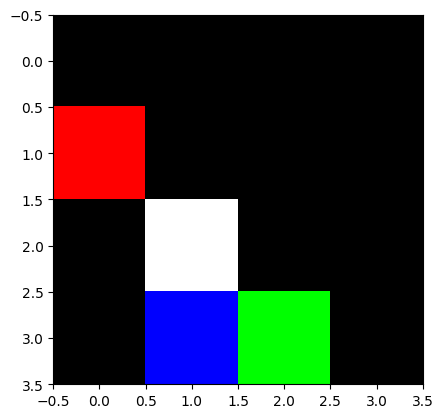

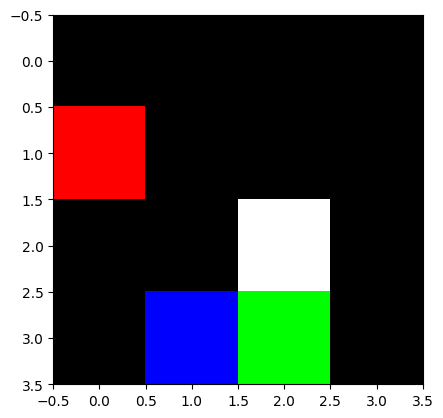

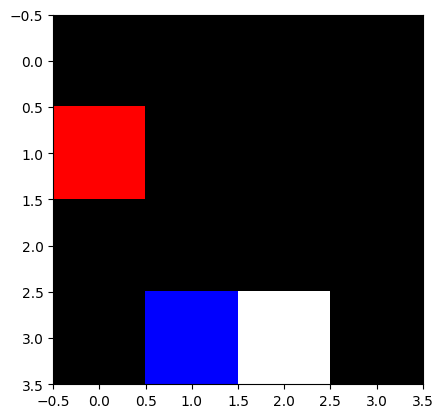

In [21]:
print(Q)
s0=8
for i in range(0,np.shape(Q)[0],1):
  indexes=np.where(Q[s0,:]==max(Q[s0,:]))
  indexes=np.array(indexes[0])
  a=indexes[random.randint(0,np.size(indexes)-1)]
  s1=get_state(s,s0,a,block)
  try:
    s0=s1[0]
  except:
    s0=s1
  print(s1)
  space_plot(s,block,goal,hole,s1)
  if((s1==goal)[0] or (s1==hole)[0]):
    break;